# TASK 2b

In [1]:
#import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
pd.set_option('display.max_colwidth', 160)
import warnings
warnings.filterwarnings('ignore')

In [2]:
input_file = "sample-superstore_2023_T3_clean.csv"
df1 = pd.read_csv(input_file, header = 0)
df1.head(10)

,Row ID,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Customer ID,...,Segment,Country,City,State,Postal Code,Region,Order ID,Order Date,Ship Date,Ship Mode
0,9798,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,2,0.4,-43.1178,CS-12490,...,Corporate,United States,Toledo,Ohio,43615,East,CA-2015-128608,2015-01-12,2015-01-17,Standard Class
1,5065,TEC-PH-10004977,Technology,Phones,GE 30524EE4,391.980,2,0.0,113.6742,CA-12265,...,Consumer,United States,Wilmington,Delaware,19805,East,CA-2017-122196,2017-09-22,2017-09-24,First Class
2,7502,TEC-PH-10004977,Technology,Phones,GE 30524EE4,470.376,3,0.2,52.9173,TC-21295,...,Consumer,United States,Westminster,California,92683,West,CA-2017-121048,2017-07-14,2017-07-18,Standard Class
3,9728,TEC-PH-10004977,Technology,Phones,GE 30524EE4,979.950,5,0.0,284.1855,KM-16720,...,Consumer,United States,Lowell,Massachusetts,1852,East,CA-2017-167395,2017-12-02,2017-12-04,First Class
4,582,TEC-PH-10004977,Technology,Phones,GE 30524EE4,470.376,3,0.2,52.9173,DV-13465,...,Consumer,United States,Denver,Colorado,80219,West,CA-2017-145233,2017-12-01,2017-12-05,Standard Class
5,7478,TEC-PH-10004977,Technology,Phones,GE 30524EE4,391.980,2,0.0,113.6742,ME-17320,...,Home Office,United States,Henderson,Kentucky,42420,South,CA-2014-167199,2014-01-06,2014-01-10,Standard Class
6,36,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,GH-14485,...,Corporate,United States,Richardson,Texas,75080,Central,CA-2016-117590,2016-12-08,2016-12-10,First Class
7,3132,TEC-PH-10004977,Technology,Phones,GE 30524EE4,627.168,4,0.2,70.5564,CC-12100,...,Home Office,United States,Los Angeles,California,90049,West,CA-2014-136399,2014-12-16,2014-12-17,First Class
8,6636,TEC-PH-10004977,Technology,Phones,GE 30524EE4,627.168,4,0.2,70.5564,MB-18085,...,Consumer,United States,Charlotte,North Carolina,28205,South,CA-2017-144498,2017-06-05,2017-06-05,Same Day
9,3331,TEC-PH-10004959,Technology,Phones,Classic Ivory Antique Telephone ZL1810,241.176,3,0.2,15.0735,KD-16270,...,Consumer,United States,Houston,Texas,77095,Central,CA-2014-165309,2014-11-11,2014-11-15,Standard Class


In [3]:
len(df1)

9994

In [4]:
print(df1.columns)

Index(['Row ID', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode'],
      dtype='object')


In [5]:
#Check updated missing value in df
df1.isnull().sum()

Row ID           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
dtype: int64

In [6]:
# Data types of each column
print(df1.dtypes)

Row ID             int64
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
dtype: object


## Descriptive Statistic

In [7]:
print(df1.describe())

            Row ID         Sales     Quantity     Discount       Profit
count  9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   4997.500000    229.858001     3.785471     0.156203    28.669940
std    2885.163629    623.245101     2.223391     0.206452   234.257639
min       1.000000      0.444000     0.000000     0.000000 -6599.978000
25%    2499.250000     17.280000     2.000000     0.000000     1.731375
50%    4997.500000     54.490000     3.000000     0.200000     8.671250
75%    7495.750000    209.940000     5.000000     0.200000    29.364000
max    9994.000000  22638.480000    14.000000     0.800000  8399.976000


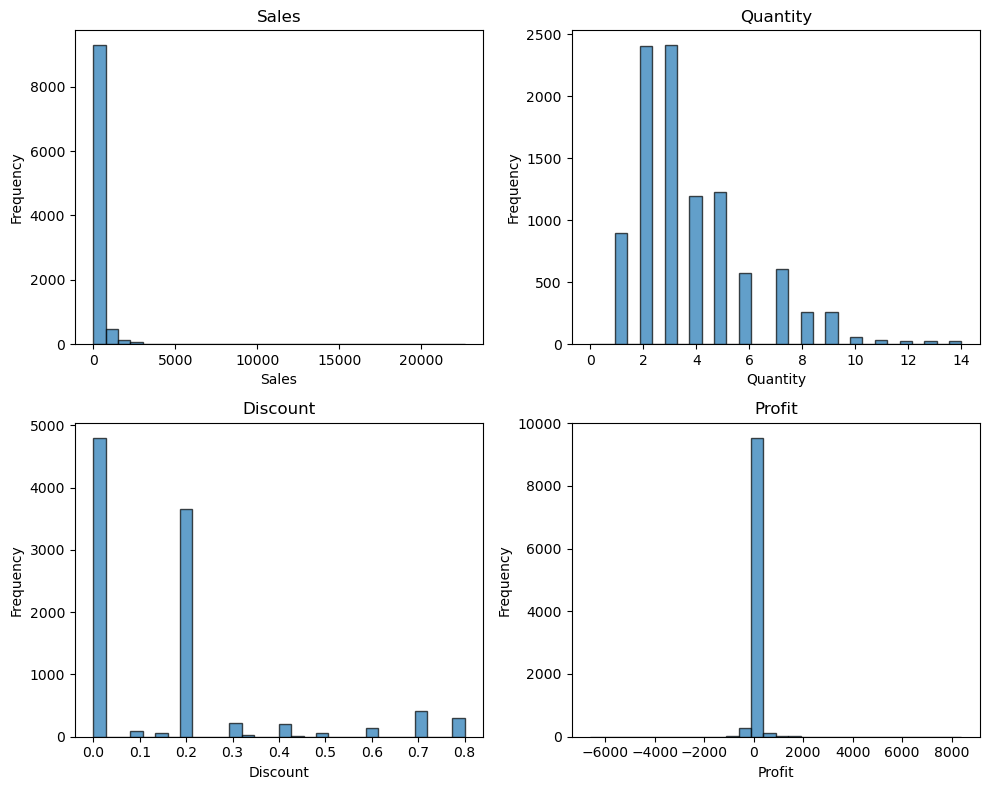

In [8]:
columns_to_plot = ['Sales', 'Quantity', 'Discount', 'Profit']

plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.hist(df1[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

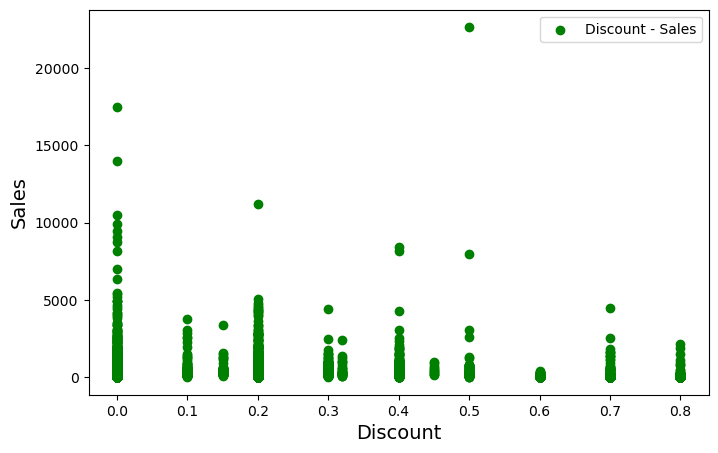

In [24]:
# plot the three dataframes for Discount and Sales columns in df1

plt.rcParams["figure.figsize"] = [8,5]
plt.scatter(df1['Discount'], df1['Sales'], color='green',label='Discount - Sales')
plt.title("", size=14)
plt.xlabel("Discount", size=14)
plt.ylabel("Profit", size=14)
plt.legend()
#plt.savefig("",transparent=False, bbox_inches='tight',pad_inches=0.1)

### Use z-score to identify and remove outliers in ['Sales', 'Quantity', 'Discount', 'Profit']

In [9]:
z_scores = zscore(df1[['Sales', 'Quantity', 'Discount', 'Profit']])
df1_no_outliers = df1[(abs(z_scores) < 3).all(axis=1)]

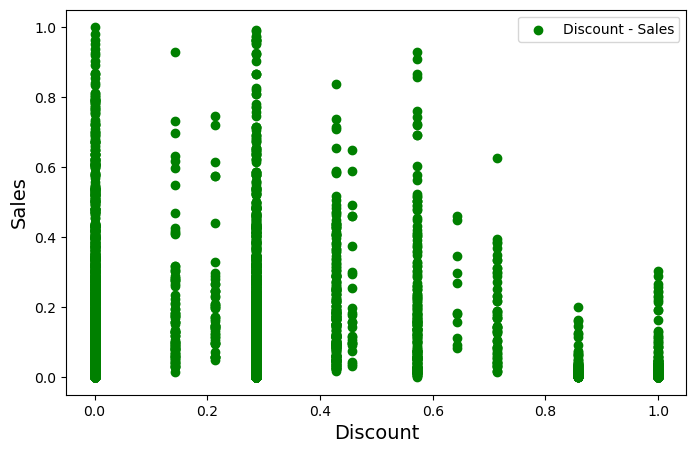

In [25]:
# plot the three dataframes for Discount and Sales columns in df1_no_outliers

plt.rcParams["figure.figsize"] = [8,5]
plt.scatter(df1_no_outliers['Discount'], df1_no_outliers['Sales'], color='green',label='Discount - Sales')
plt.title("", size=14)
plt.xlabel("Discount", size=14)
plt.ylabel("Sales", size=14)
plt.legend()
#plt.savefig("",transparent=False, bbox_inches='tight',pad_inches=0.1)

Interpretaion: The bigger discount 

### Scaling the variables

In [11]:
scaler = MinMaxScaler() # Apply Min-Max scaling
numerical_vars = ['Sales', 'Quantity', 'Discount', 'Profit']
df1_no_outliers[numerical_vars] = scaler.fit_transform(df1_no_outliers[numerical_vars])
df1_no_outliers[numerical_vars].head(3)

,Sales,Quantity,Discount,Profit
0,0.112740,0.2,0.571429,0.450216
1,0.188174,0.2,0.000000,0.565907
2,0.225890,0.3,0.285714,0.521077


### Calculate the correlation matrix for the numerical variables

In [13]:
correlation_matrix = df1_no_outliers[numerical_vars].corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.251509 -0.010596  0.449966
Quantity  0.251509  1.000000  0.001035  0.123694
Discount -0.010596  0.001035  1.000000 -0.359503
Profit    0.449966  0.123694 -0.359503  1.000000


Interpretation:

Sales and Profit (0.449966): A moderate positive correlation between Sales and Profit. As Sales increase, Profit tends to increase as well.

Sales and Quantity (0.251509): A mild positive correlation between Sales and Quantity. The higher quantities sold, the higher sales might be, but the relationship is not as strong as between Sales and Profit.

Discount and Profit (-0.359503): A moderate negative correlation between Discount and Profit. The higher discounts associated with lower profits. Discounts might increase sales volume or quantity, it may reduce profit margins.

## Correlation Analysis for Numerical vs Numerical

### Data aggregations or frequency distributions, Group by 'Category' and calculate the mean of 'Sales' and 'Profit'

In [15]:
Category_num = df1_no_outliers.groupby('Category')['Sales', 'Quantity', 'Discount', 'Profit'].mean()
print(Category_num)

                    Sales  Quantity  Discount    Profit
Category                                               
Furniture        0.145086  0.361426  0.249789  0.487752
Office Supplies  0.045752  0.368867  0.175795  0.497126
Technology       0.141447  0.356899  0.187978  0.517914


### Describe features that are related and the nature of that relationship

In [16]:
correlation_matrix_Category_num = Category_num.corr()
print(correlation_matrix_Category_num)

             Sales  Quantity  Discount    Profit
Sales     1.000000 -0.914579  0.651884  0.181800
Quantity -0.914579  1.000000 -0.289528 -0.563939
Discount  0.651884 -0.289528  1.000000 -0.627170
Profit    0.181800 -0.563939 -0.627170  1.000000


There is a positive correlation between Sales and Profit with correlation coefficient 0.305937. As one variable increases, the other variable tends to also increase. As the Sales increase, Profit also tends to increase.

The correlation coefficient of 0.305937 is a moderate strength of association.

The higher sales are associated with higher profits, but the relationship is not very strong, possibly there are influence of other variables on profits as well.

### Data aggregations or frequency distributions, Group by 'Category' and calculate the mean of 'Discount' and 'Profit'

In [18]:
Discount_Profit = df1.groupby('Category')['Discount', 'Profit'].mean()
print(Discount_Profit)

                 Discount     Profit
Category                            
Furniture        0.173923   8.735818
Office Supplies  0.157285  20.335838
Technology       0.132323  78.752002


In [19]:
correlation_matrix_Discount_Profit = Discount_Profit.corr()
print(correlation_matrix_Discount_Profit)

          Discount    Profit
Discount  1.000000 -0.968068
Profit   -0.968068  1.000000


# Task 3

## Bivariate Analysis of Two Categorical Variables

In [20]:
# cross-tabulation (contingency table)
crosstab = pd.crosstab(df1['Segment'], df1['Ship Mode'])
print(crosstab)

Ship Mode    First Class  Same Day  Second Class  Standard Class
Segment                                                         
Consumer             769       317          1021            3084
Corporate            485       114           610            1811
Home Office          284       112           316            1071


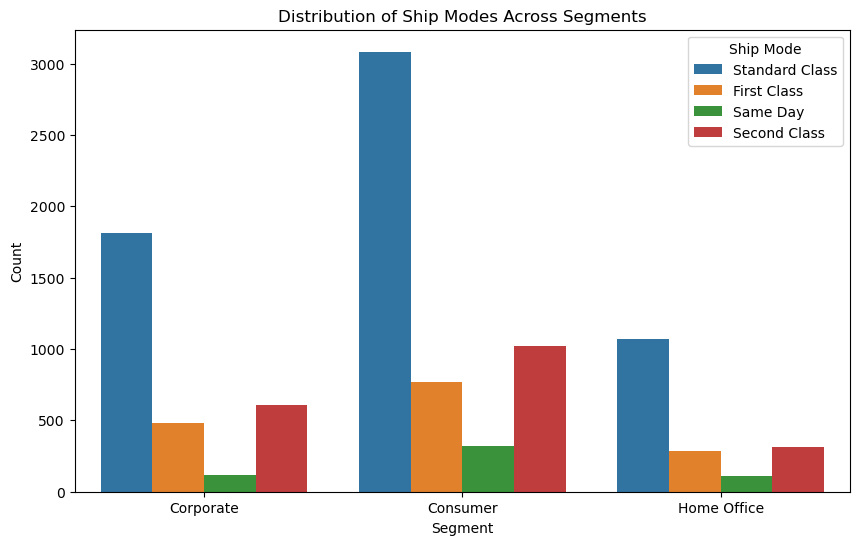

In [22]:
# Bar chart of 'Segment' and 'Ship Mode'
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', hue='Ship Mode', data=df1)
plt.title('Distribution of Ship Modes Across Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.legend(title='Ship Mode')
plt.show()

<span style="color: green;">Interpretation: Standard Class is the preferred mode of shipping across all segments.</span>

## Bivariate Analysis of Categorical vs Numerical Variables

In [ ]:
mean_profits_by_region = df.groupby('Region')['Profit'].mean().reset_index()
mean_profits_by_region_sorted = mean_profits_by_region.sort_values('Profit', ascending=False)
mean_profits_by_region_sorted

In [ ]:
# Top Region by mean profit
top_regions = mean_profits_by_region_sorted.head(1)

# Bottom Region by mean profit
bottom_regions = mean_profits_by_region_sorted.tail(1)

# Combining top and bottom for visualization
combined_regions = pd.concat([top_regions, bottom_regions])

plt.figure(figsize=(4, 3))
sns.barplot(x='Profit', y='Region', data=combined_regions, palette='viridis')
plt.title('Top and Bottom Regions by Mean Profit')
plt.xlabel('Mean Profit')
plt.ylabel('Region')
plt.show()

## Bivariate Analysis of Numerical vs Numerical Variables

In [ ]:
#Scatter plot of 'Sales' vs 'Profit'
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Calculate correlation coefficient between 'Sales' and 'Profit'
correlation = df[['Sales', 'Profit']].corr()
print(correlation)

In [ ]:
#Scatter plot of 'Sales' vs 'Profit'
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Sales', y='Profit', data=df_no_outliers)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Calculate correlation coefficient between 'Sales' and 'Profit'
correlation = df_no_outliers[['Sales', 'Profit']].corr()
print(correlation)

In [ ]:
import statsmodels.api as sm

# Simple Linear Regression with 'Sales' as independent variable and 'Profit' as dependent variable
X = df['Sales']
y = df['Profit']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

In [ ]:
#Scatter plot of 'Discount' vs 'Profit'
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Calculate correlation coefficient between 'Discount' and 'Profit'
correlation = df[['Discount', 'Profit']].corr()
print(correlation)

In [ ]:
#Scatter plot of 'Discount' vs 'Profit'
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Discount', y='Profit', data=df_no_outliers)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

In [ ]:
# Calculate correlation coefficient between 'Discount' and 'Profit'
correlation = df_no_outliers[['Discount', 'Profit']].corr()
print(correlation)

In [ ]:
import statsmodels.api as sm

# Simple Linear Regression with 'Discount' as independent variable and 'Profit' as dependent variable
X = df['Discount']
y = df['Profit']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())